In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir("/content/drive/My Drive/Thesis")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
#import official.nlp.bert.tokenization

In [ ]:
import json

In [ ]:
with open('training.json') as f:
  file = json.load(f)
  f.close()


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
sequence_length = 200
positive_map = [0] * 401
negative_map = [0] * 401
xpn = [_ for _ in range(-200, 201)]
mx = 0
mn = sequence_length + 1
for dic in file[:464]:
  for i in range(len(dic['x_pos'])):
    if dic['x_pos'][i] != 0:
      for j in range(len(dic['x_pos'])):
        if dic['y_pos'][j] != 0:
          dist = i - j + sequence_length
          if dic['x_pos'][i] == dic['y_pos'][j]:
            positive_map[dist] = 1 + positive_map[dist]
          else:
            negative_map[dist] = 1 + negative_map[dist]
          
          mx = max(mx, dist)
          mn = min(mn, dist)

print(mx, mn)
print(np.max(positive_map), np.max(negative_map))

negative_map[sequence_length * 2 - 1] = 1
positive_map[sequence_length * 2 - 1] = 1 


for i in range(1, sequence_length * 2):
  if positive_map[i] == 0:
    for j in range(i + 1, sequence_length * 2):
      if positive_map[j] != 0:
        for k in range(i, j):
          x = j - i + 2
          y = positive_map[j] - positive_map[i - 1]
          d = y / x
          positive_map[k] = d * (k - i + 1)
        break

for i in range(1, sequence_length * 2):
  if negative_map[i] == 0:
    for j in range(i + 1, sequence_length * 2):
      if negative_map[j] != 0:
        for k in range(i, j):
          x = j - i + 2
          y = negative_map[j] - negative_map[i - 1]
          d = y / x
          negative_map[k] = d * (k - i + 1)
        break

337 43
264 216


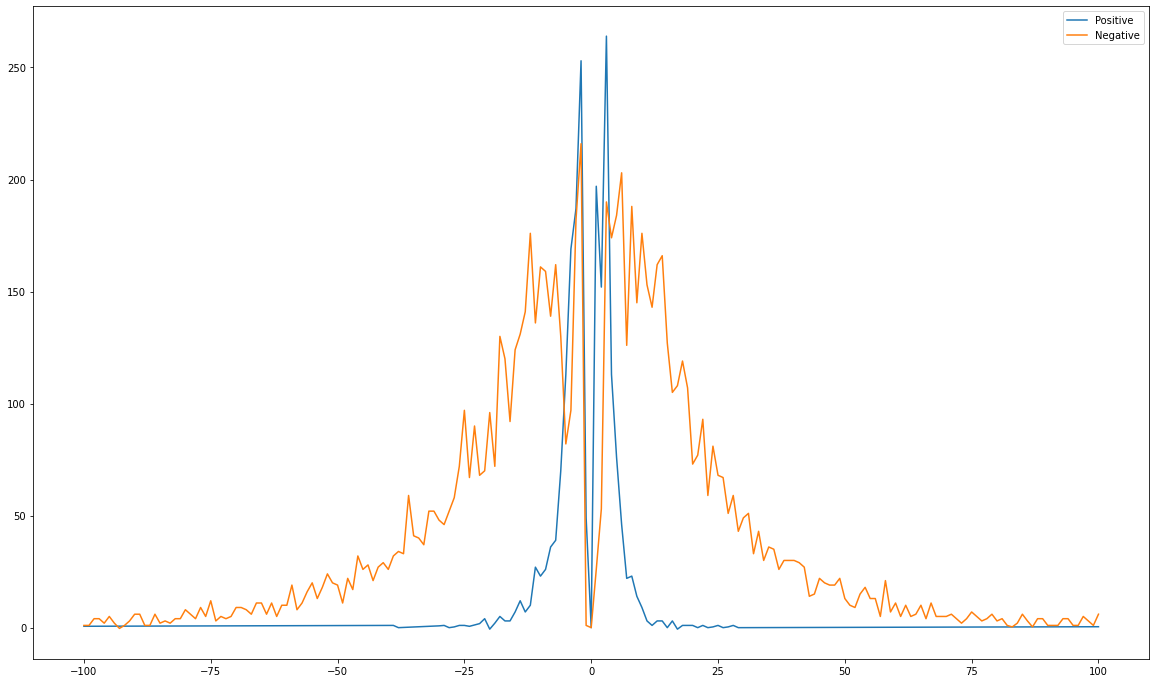

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(xpn[100:301], positive_map[100:301], label='Positive')
plt.plot(xpn[100:301], negative_map[100:301], label='Negative')#plt.text(0.08, 0.2, 'Positive')
plt.legend()
plt.savefig('parademon.png')

In [ ]:

a = np.array(positive_map) + 0.001
b = np.array(negative_map) + 0.001
c = a + b
d = a / c

In [ ]:
positive_map[200] = 0
negative_map[200] = 0

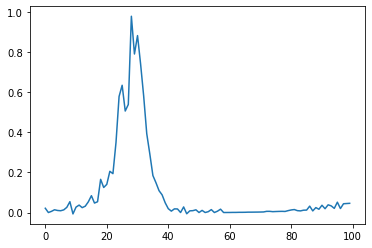

In [ ]:
plt.plot(d[171: 271])

In [ ]:
def get_arr(df):
  ty, py = [], []
  for dic in df:
    x = dic['x_pos']
    y = dic['y_pos']
    for i in range(len(x)):
      if x[i] != 0:
        temp_ty = []
        temp_py = []
        for j in range(len(y)):
          if y[j] != 0:
            d = i - j + sequence_length
            #print(d)
            p = positive_map[d] / (positive_map[d] + negative_map[d])
            temp_py.append(p)
            if y[j] == x[i]:
              temp_ty.append(1)
            else:
              temp_ty.append(0)

        #following commented lines are required for getting results in 1, 0 (true, false)
        #idx = np.argmax(temp_py) # for argmax based
        #temp_py = [0] * len(temp_ty)
        #temp_py[idx] = 1
        ty.extend(temp_ty)
        py.extend(temp_py) 

  return ty, py



In [ ]:
a, b = get_arr(file[:464])

In [ ]:
print(classification_report(a, b))

ValueError: ignored

In [ ]:
print(confusion_matrix(a, b))

ValueError: ignored

In [ ]:
c, d = get_arr(file[464:])

In [ ]:
print(classification_report(c, d))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3026
           1       0.73      0.73      0.73       548

    accuracy                           0.92      3574
   macro avg       0.84      0.84      0.84      3574
weighted avg       0.92      0.92      0.92      3574



In [ ]:
print(confusion_matrix(c, d))

[[2824  202]
 [ 202  346]]


In [ ]:
e, f = get_arr(file[:464])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, th = roc_curve(e, f)

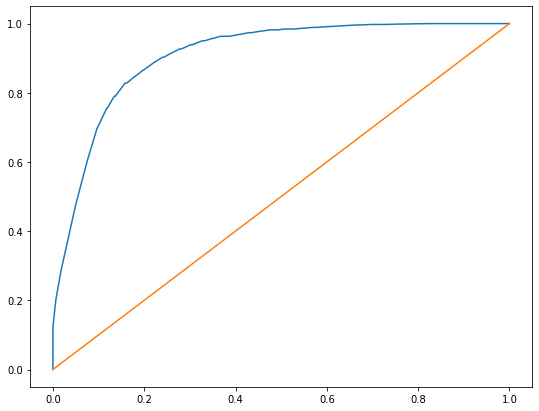

In [ ]:
plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.show()

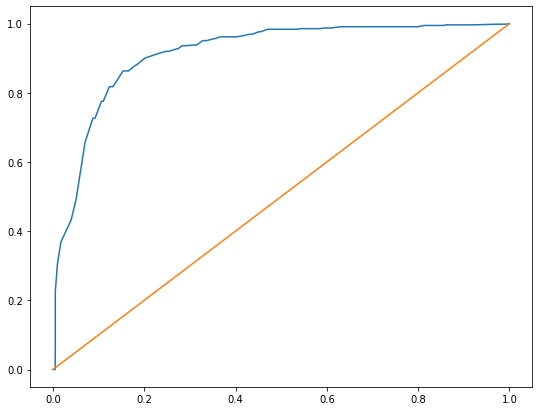

In [ ]:
p, q = get_arr(file[464:])
a, b, c = roc_curve(p, q)
plt.figure(figsize=(9, 7))
plt.plot(a, b)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(e, f)

0.9081501131236769

In [ ]:
roc_auc_score(p, q)

0.9148709963768991